In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv')
dataset = pd.read_csv(directory)
dataset_numbers = dataset.select_dtypes(include = ['float64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32c5b4ddd8>,
      dtype=object)

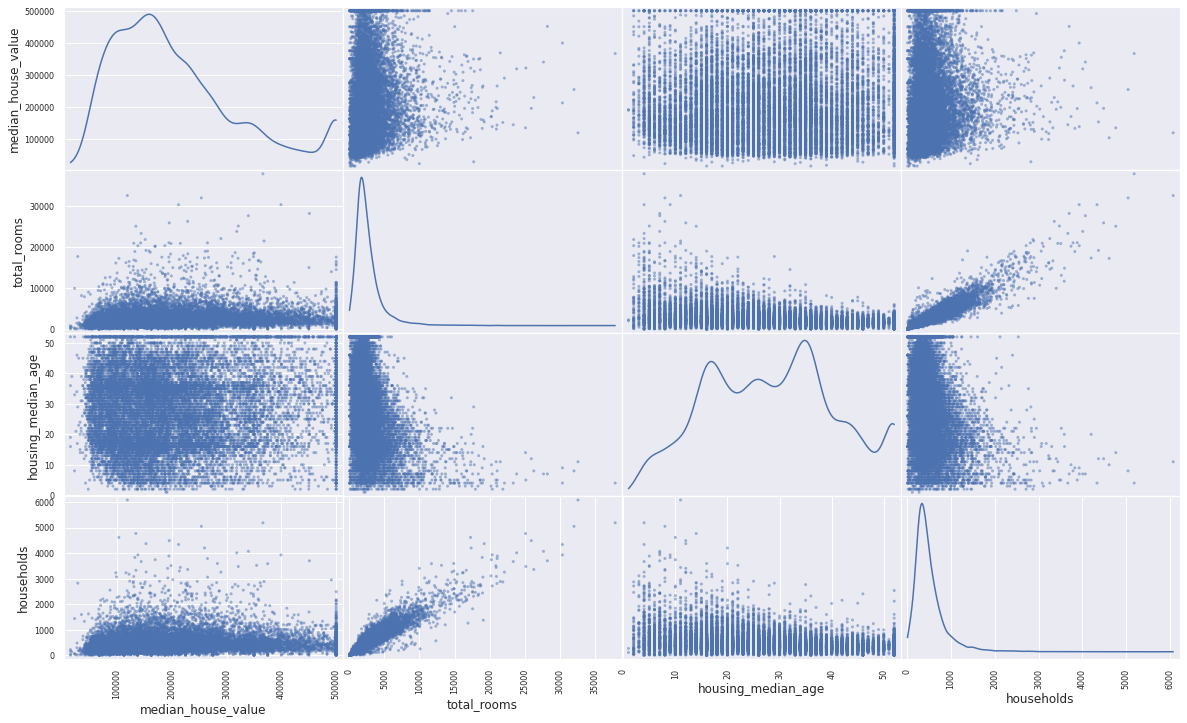

In [ ]:
#nomor 1
sns.set()
feat = ['median_house_value','total_rooms', 'housing_median_age', 'households']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal = 'kde')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


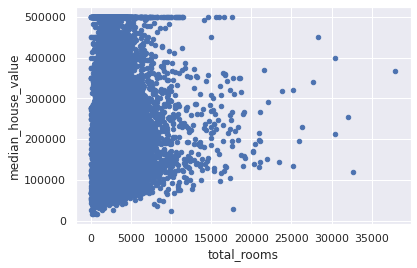

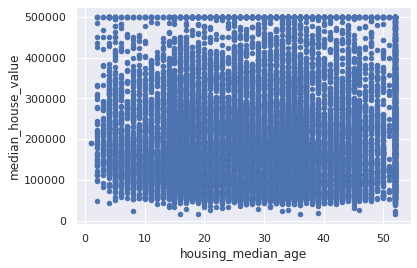

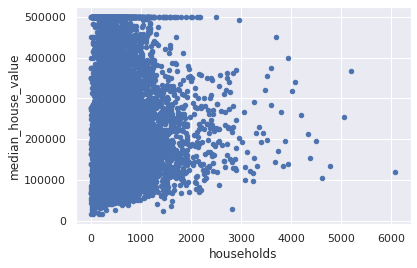

In [ ]:
dataset.plot(kind="scatter", x="total_rooms", y="median_house_value")
dataset.plot(kind="scatter", x="housing_median_age", y="median_house_value")
dataset.plot(kind="scatter", x="households", y="median_house_value")
plt.show()

In [ ]:
#nomor 2
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 

feature = dataset.drop(['median_house_value'], axis=1)
label = dataset['median_house_value'] 

feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split

feature_train90, feature_test90, label_train10, label_test10 = train_test_split(feature_scaled, label_scaled, test_size=0.1)  #Training 90% & testing 10%
feature_train85, feature_test85, label_train15, label_test15 = train_test_split(feature_scaled, label_scaled, test_size=0.1)  #Training 85% & testing 15%
feature_train80, feature_test80, label_train20, label_test20 = train_test_split(feature_scaled, label_scaled, test_size=0.1)  #Training 80% & testing 20%

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train90, label_train10)
r2_score(forest_reg.predict(feature_train90),label_train10)
forest_score9010 = r2_score(forest_reg.predict(feature_test90), label_test10)

print("Skor R2 yang didapatkan dari komposisi training & testing 90:10 adalah ", forest_score9010)

Skor R2 yang didapatkan dari komposisi training & testing 90:10 adalah  0.7814671256465572


In [ ]:
forest_reg.fit(feature_train85, label_train15)
r2_score(forest_reg.predict(feature_train85),label_train15)
forest_score8515 = r2_score(forest_reg.predict(feature_test85), label_test15)

print("Skor R2 yang didapatkan dari komposisi training & testing 85:15 adalah ", forest_score8515)

Skor R2 yang didapatkan dari komposisi training & testing 85:15 adalah  0.7801018537646662


In [ ]:
forest_reg.fit(feature_train80, label_train20)
r2_score(forest_reg.predict(feature_train80),label_train20)
forest_score8020 = r2_score(forest_reg.predict(feature_test80), label_test20)

print("Skor R2 yang didapatkan dari komposisi training & testing 80:20 adalah ", forest_score8020)

Skor R2 yang didapatkan dari komposisi training & testing 80:20 adalah  0.7608229071342107


Kesimpulan yang di dapatkan:
Skor R2 yang dihasilkan dari 90% dan 85% training memiliki nilai lebih besar di bandingkan daripada 80% training. Hal ini menandakan bahwa jumlah training atau data set yang dimiliki mempengaruhi hasil R2.

In [ ]:
#nomor 3
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', gamma='auto')
svr_poly = SVR(kernel='poly', gamma='auto', degree=3, epsilon=.1, coef0=1)

svr_rbf.fit(feature_train80, label_train20)
svr_lin.fit(feature_train80, label_train20)
svr_poly.fit(feature_train80, label_train20)

SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_lin.fit(feature_train80, label_train20)
r2_score(svr_lin.predict(feature_test80), label_test20)


0.4208307725699133

In [ ]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train80,label_train20)
r2_score(linear_reg.predict(feature_test80), label_test20)

0.44036058826871727

Kesimpulan:
Hasil R2 dari Linear Regresion memiliki tingkat keakurasi lebih tinggi dibanding SVR Linear dan SVR Linear membutuhkan waktu yang lebih lama.